In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model

In [69]:
demo = pd.read_sas('DEMO_I.XPT') 
bmx = pd.read_sas("BMX_I.XPT")

# First Problem:
You'll perform an inner merge between the body measurements (BMX) table and the demographics (DEMO) table to begin some data analysis.

In [70]:
merged = bmx.merge(right = demo, on = 'SEQN')
print(merged.head())
print(merged.shape)

      SEQN  BMDSTATS  BMXWT  BMIWT  BMXRECUM  BMIRECUM  BMXHEAD  BMIHEAD  \
0  83732.0       1.0   94.8    NaN       NaN       NaN      NaN      NaN   
1  83733.0       1.0   90.4    NaN       NaN       NaN      NaN      NaN   
2  83734.0       1.0   83.4    NaN       NaN       NaN      NaN      NaN   
3  83735.0       1.0  109.8    NaN       NaN       NaN      NaN      NaN   
4  83736.0       3.0   55.2    NaN       NaN       NaN      NaN      NaN   

   BMXHT  BMIHT    ...     DMDHREDU  DMDHRMAR  DMDHSEDU       WTINT2YR  \
0  184.5    NaN    ...          5.0       1.0       3.0  134671.370419   
1  171.4    NaN    ...          3.0       3.0       NaN   24328.560239   
2  170.1    NaN    ...          3.0       1.0       3.0   12400.008522   
3  160.9    NaN    ...          5.0       6.0       NaN  102717.995647   
4  164.9    NaN    ...          4.0       3.0       NaN   17627.674984   

        WTMEC2YR  SDMVPSU  SDMVSTRA  INDHHIN2  INDFMIN2  INDFMPIR  
0  135629.507405      1.0     

In [71]:
print(merged.RIDAGEMN.describe()) 

count    6.620000e+02
mean     1.075831e+01
std      6.994847e+00
min      5.397605e-79
25%      5.000000e+00
50%      1.000000e+01
75%      1.700000e+01
max      2.400000e+01
Name: RIDAGEMN, dtype: float64


In [72]:
RIDAGEMN = merged.loc[~merged.RIDAGEMN.isnull(),"RIDAGEMN"]
print(type(RIDAGEMN))
print(type(RIDAGEMN.values))
print(type(np.array(RIDAGEMN)))
print(type(RIDAGEMN.values.astype(int)))
# print(RIDAGEMN.values.astype(int))
# print(RIDAGEMN.astype(int))

<class 'pandas.core.series.Series'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


# create a df without NaN

In [73]:
df = merged.loc[((~merged.DMDBORN4.isnull()) & (~merged.BMXWT.isnull()) & (~merged.RIDRETH3.isnull()))
                 ,("DMDBORN4","BMXWT","RIDRETH3")]
print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9445 entries, 0 to 9543
Data columns (total 3 columns):
DMDBORN4    9445 non-null float64
BMXWT       9445 non-null float64
RIDRETH3    9445 non-null float64
dtypes: float64(3)
memory usage: 295.2 KB
None
   DMDBORN4  BMXWT  RIDRETH3
0       1.0   94.8       3.0
1       2.0   90.4       3.0
2       1.0   83.4       3.0
3       1.0  109.8       3.0
4       1.0   55.2       4.0


# table

In [74]:
# set_index & sort_index
print(df.set_index(['RIDRETH3','DMDBORN4']).sort_index(ascending=True).head())

                   BMXWT
RIDRETH3 DMDBORN4       
1.0      1.0        37.2
         1.0        51.7
         1.0       100.8
         1.0        56.6
         1.0        18.2


In [75]:
# pivot
table = df.pivot_table(index = 'RIDRETH3', columns = 'DMDBORN4', values = 'BMXWT',aggfunc = 'mean')
print(table)
print(pd.DataFrame(np.array(table),columns = ["x1","x2","x3"], index = ['a','b','c','d','e','f']))


DMDBORN4       1.0        2.0    99.0
RIDRETH3                             
1.0       53.395635  76.302972   68.9
2.0       52.261079  73.710000    NaN
3.0       64.163359  70.363918    NaN
4.0       65.532812  73.151149  112.0
6.0       42.670447  62.580175    NaN
7.0       55.173121  61.776087    NaN
          x1         x2     x3
a  53.395635  76.302972   68.9
b  52.261079  73.710000    NaN
c  64.163359  70.363918    NaN
d  65.532812  73.151149  112.0
e  42.670447  62.580175    NaN
f  55.173121  61.776087    NaN


In [76]:
# groupby with increasing
print(df.groupby(['RIDRETH3','DMDBORN4'])["BMXWT"].mean().sort_values(ascending=True).head())

RIDRETH3  DMDBORN4
6.0       1.0         42.670447
2.0       1.0         52.261079
1.0       1.0         53.395635
7.0       1.0         55.173121
          2.0         61.776087
Name: BMXWT, dtype: float64


# plot

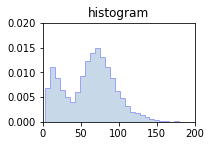

In [77]:
# hist
plt.subplot(2,2,1)
plt.hist(df.BMXWT,
         bins=30,
         density=True,
         histtype='stepfilled', 
         alpha=0.3,
         color='steelblue',
         edgecolor='blue')
plt.title("histogram")
plt.xlim([0, 200])
plt.ylim([0,0.02])
# plt.xlabel('x')
# plt.ylabel('f(x)')
plt.show()

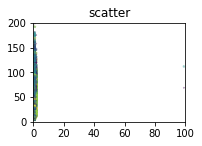

In [78]:
# scatter
plt.subplot(2,2,2)
size = 100*df.RIDRETH3
# print(size)

plt.scatter("DMDBORN4","BMXWT",data=df,
           s = "RIDRETH3", c = "RIDRETH3", marker = "*", alpha = 0.3)
plt.title('scatter')
plt.xlim([0, 100])
plt.ylim([0,200])
plt.show()

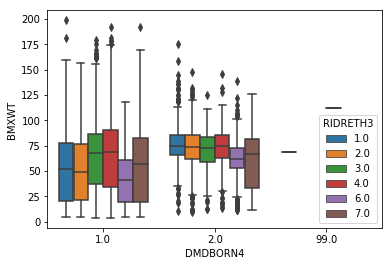

In [79]:
# boxplots
sns.boxplot(x="DMDBORN4", y="BMXWT", hue="RIDRETH3", data=df) 
plt.show()

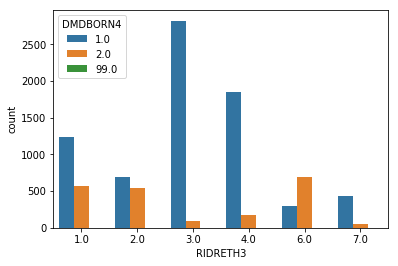

In [82]:
# bar (count plot)
sns.countplot(x="RIDRETH3",hue="DMDBORN4",data=df) 
plt.show()

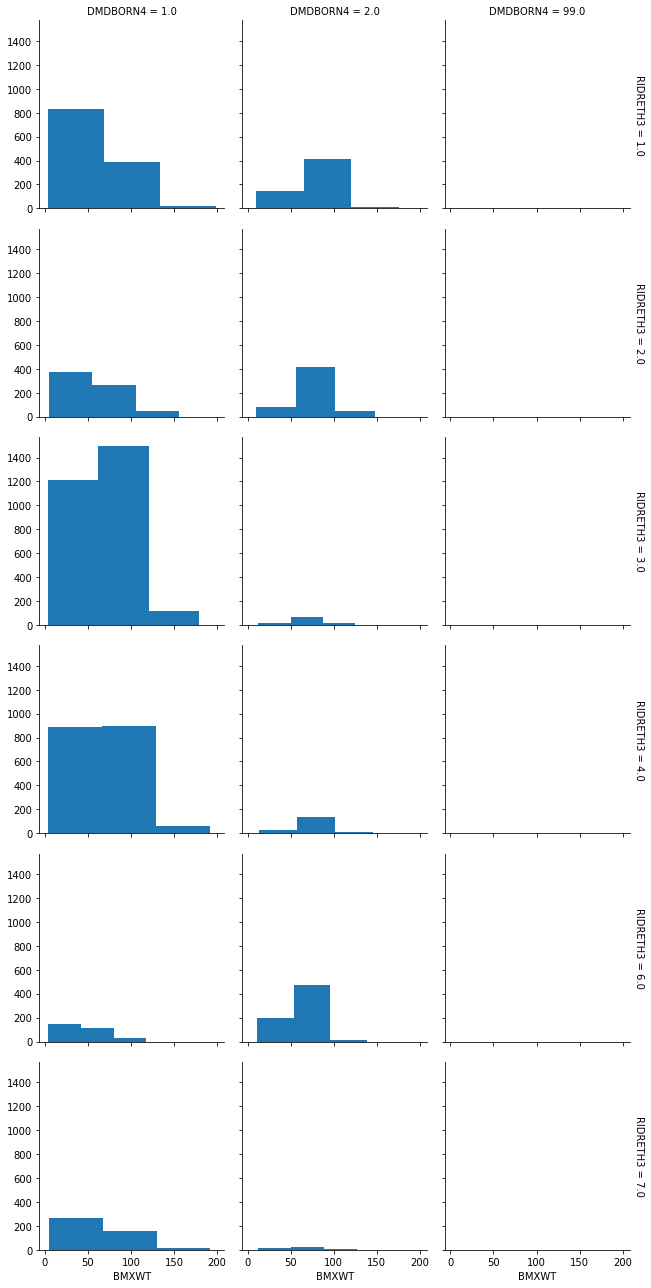

In [85]:
# sns.FacetGrid
g = sns.FacetGrid(df, row = "RIDRETH3", col='DMDBORN4', margin_titles=True) # you can even have a 2D facet grid
g.map(plt.hist, "BMXWT", density = False, bins=3)

# linear regression

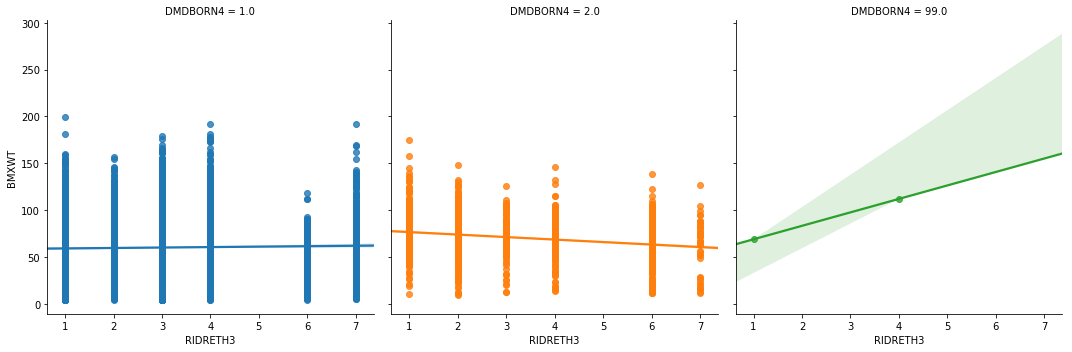

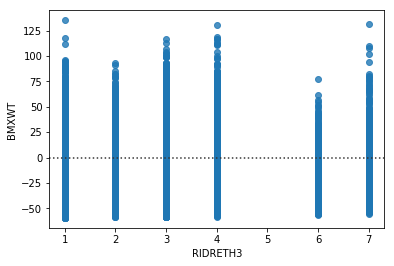

In [155]:
sns.lmplot(x="RIDRETH3",y="BMXWT",hue="DMDBORN4", col = 'DMDBORN4',data=df)
plt.show()

sns.residplot(x="RIDRETH3",y="BMXWT",data=df)
plt.show()

In [184]:
# SciKit Learn requires that the features (x) be a matrix: changing format via reshape
# and the response y be a one-dimension array
model = linear_model.LinearRegression(fit_intercept = True)

print(type(df.BMXWT.values))
print(type(df.RIDRETH3.values))
# x = df.RIDRETH3.values.reshape([9445,1])
x = df.loc[:,("DMDBORN4","RIDRETH3")]
y = df.BMXWT.values
model.fit(x,y)
print(model.coef_)
print(model.intercept_)

y_hat = model.predict(x)
residual = y - y_hat
print(np.mean(residual))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
[ 1.07028346 -0.5640287 ]
62.94899438036029
3.719347046689185e-15


In [214]:
prediction_x1  = np.linspace(1,7,9445)
print(prediction_x1.shape)

prediction_x2  = np.linspace(1,2,9445)
print(prediction_x2.shape)

prediction_x  = pd.DataFrame({'RIDRETH3': prediction_x1,
                              'DMDBORN4': prediction_x2})  
print(prediction_x.shape)
print(prediction_x.head())

model.predict(prediction_x)

# plt.scatter(x, y)
# plt.plot(prediction_x, model.predict(prediction_x), color = 'red')
# plt.show()

(9445,)
(9445,)
(9445, 2)
   DMDBORN4  RIDRETH3
0  1.000000  1.000000
1  1.000106  1.000635
2  1.000212  1.001271
3  1.000318  1.001906
4  1.000424  1.002541


array([63.45524913, 63.45500412, 63.45475911, ..., 61.14185039,
       61.14160538, 61.14136037])